# Index <a name='ind'/>
<a href=#loadImp>Import and Load Dataset</a><br>
<a href=#chi2edre>Chi-square Test and Lift (Ed. level vs Remote Work)</a><br>
<a href=#chi2genre>Chi-square Test and Lift (Gender vs Remote Work)</a><br>
<a href=#kmYCYS>K-means Clutering (Years of Coding vs Yearly Salary)</a><br>

# Import and Load Dataset <a name='loadImp' />
<a href=#ind>Go top</a>

In [5]:
import numpy as np
import pandas as pd
# import atoti as tt
import ipywidgets as widgets
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.cluster import KMeans
from collections import Counter
import cmd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [6]:
#Loading SODS

df = pd.read_csv("survey_results_public.csv")
# df

# Chi-square Test and Lift (Ed. Level vs Remote Work) <a name='chi2edre' />
<a href=#ind>Go top</a>

In [7]:
def lift_corr(contigency_pct):
    ct = contigency_pct.to_numpy()
    sm = np.sum(ct)
    csm = np.sum(ct, axis=0)
    rsm = np.sum(ct, axis=1)
    r = np.size(ct, 0)
    c = np.size(ct, 1)
    for i in range(0, r):
        pn = ''
        for j in range(0, c):
            k=(ct[i,j]/sm)/((csm[j]/sm)*(rsm[i]/sm))
            if k > 1:
                pn = '+ve'
            elif k < 1:
                pn = '-ve'
            else:
                pn = 'ind'
            print(pn, end='\t')
        print('')
        

def chi_oe(contigency_pct, expected):
    ob = contigency_pct.to_numpy()
    oe = ob-expected
    out = np.where(oe>0,'+ve','-ve')
#     print(out)
    r = np.size(out, 0)
    c = np.size(out, 1)
    for i in range(0, r):
        for j in range(0, c):
            print(out[i,j], end='\t')
        print('')

In [8]:
d = pd.DataFrame(df[['EdLevel', 'RemoteWork']])
# d.loc[d['EdLevel'] != 'Other doctoral degree (Ph.D., Ed.D., etc.)'] = 'Non-PhD'
# d.loc[d['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'] = 'PhD'
d['EdLevel'] = np.where(d['EdLevel'] != 'Other doctoral degree (Ph.D., Ed.D., etc.)','Non-PhD', d['EdLevel'])
d['EdLevel'] = np.where(d['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)','PhD', d['EdLevel'])
d['RemoteWork'] = np.where(d['RemoteWork'] == 'Hybrid (some remote, some in-person)','Hybrid', d['RemoteWork'])
# d['RemoteWork'].unique()
d_nonnan = d.dropna()
d_nonnan
# df[['EdLevel', 'RemoteWork']]

EdLevel      RemoteWork
1      Non-PhD    Fully remote
2      Non-PhD          Hybrid
3      Non-PhD    Fully remote
4      Non-PhD          Hybrid
8      Non-PhD          Hybrid
...        ...             ...
73263  Non-PhD    Fully remote
73264  Non-PhD  Full in-person
73265  Non-PhD          Hybrid
73266  Non-PhD          Hybrid
73267  Non-PhD    Fully remote

[58958 rows x 2 columns]

In [9]:
# https://predictivehacks.com/how-to-run-chi-square-test-in-python/
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
contigency_pct = pd.crosstab(d_nonnan['EdLevel'], d_nonnan['RemoteWork'])
c, p, dof, expected = chi2_contingency(contigency_pct)
print('Chi2 analysis for Ed. level vs. Remote Work Mode')
print('chi2 value, c: %.3f' %c)
# print('p-value:', p)
print('dof:',dof)
print('expected:')
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in expected]))
contigency_pct

Chi2 analysis for Ed. level vs. Remote Work Mode
chi2 value, c: 155.039
dof: 2
expected:
8297.987448692289	24462.459276094847	24153.553275212864
298.01255130771057	878.5407239051528	867.4467247871366


RemoteWork  Full in-person  Fully remote  Hybrid
EdLevel                                         
Non-PhD               8294         24720   23900
PhD                    302           621    1121

In [10]:
prob = 0.05
critical = chi2.ppf(prob, dof)
if abs(c) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

chi_oe(contigency_pct, expected)

Dependent (reject H0)
-ve	+ve	-ve	
+ve	-ve	+ve	


In [11]:
lift_corr(contigency_pct)

-ve	+ve	-ve	
+ve	-ve	+ve	


# Chi-square Test and Lift (Gender vs Remote Work) <a name='chi2genre' />
<a href=#ind>Go top</a>

In [12]:
dg = pd.DataFrame(df[['Gender', 'RemoteWork']]).dropna()
dg.loc[dg['Gender'].str.contains('Woman'), 'Gender'] = 'Female'
dg.loc[dg['Gender'].str.contains('Man'), 'Gender'] = 'Male'
dg.loc[dg['Gender'].str.contains('queer'), 'Gender'] = 'Others'
dg.loc[dg['Gender'].str.contains('Or'), 'Gender'] = 'Others'
dg.loc[dg['Gender'].str.contains('say'), 'Gender'] = 'Others'
dg['RemoteWork'] = np.where(dg['RemoteWork'] == 'Hybrid (some remote, some in-person)','Hybrid', dg['RemoteWork'])
# d.loc[d['Gender'] != 'Male' and d['Gender'] != 'Female'] = 'Others'
dg

Gender      RemoteWork
2        Male          Hybrid
3        Male    Fully remote
8      Female          Hybrid
9      Female    Fully remote
10       Male          Hybrid
...       ...             ...
73263    Male    Fully remote
73264    Male  Full in-person
73265    Male          Hybrid
73266    Male          Hybrid
73267    Male    Fully remote

[58294 rows x 2 columns]

In [13]:
# https://predictivehacks.com/how-to-run-chi-square-test-in-python/
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
contigency_pct2 = pd.crosstab(dg['Gender'], dg['RemoteWork'])
c, p, dof, expected = chi2_contingency(contigency_pct2)
print('Chi2 analysis for Gender vs. Remote Work Mode')
print('chi2 value, c: %.3f' %c)
# print('p-value:', p)
print('dof:',dof)
print('expected:')
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in expected]))

contigency_pct2

Chi2 analysis for Gender vs. Remote Work Mode
chi2 value, c: 13.950
dof: 4
expected:
427.3836586955776	1263.7488249219473	1247.867516382475
7835.706384876659	23169.731773424366	22878.561841698975
213.90995642776272	632.5194016536865	624.5706419185508


RemoteWork  Full in-person  Fully remote  Hybrid
Gender                                          
Female                 415          1341    1183
Male                  7870         23057   22957
Others                 192           668     611

In [14]:
prob = 0.05
critical = chi2.ppf(prob, dof)
if abs(c) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
chi_oe(contigency_pct2, expected)

Dependent (reject H0)
-ve	+ve	-ve	
+ve	-ve	+ve	
-ve	+ve	-ve	


# K-means Clutering (Years of Coding vs Yearly Salary) <a name='kmYCYS' />
<a href=#ind>Go top</a>

In [15]:
dy = df[['YearsCode', 'ConvertedCompYearly']].dropna()
dy = pd.DataFrame(dy)
dy['YearsCode'] = np.where(dy['YearsCode'] == 'More than 50 years','50', dy['YearsCode'])
dy['YearsCode'] = np.where(dy['YearsCode'] == 'Less than 1 year','1', dy['YearsCode'])
dy['YearsCode'] = dy['YearsCode'].astype(float)
dy['ConvertedCompYearly'] = dy['ConvertedCompYearly'].astype(float)
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(dy[['YearsCode', 'ConvertedCompYearly']])
dy['label'] = label
centroids = kmeans.cluster_centers_
print('centroids:\n', centroids)

centroids:
 [[1.43462920e+01 8.78744282e+04]
 [1.99482759e+01 1.10538050e+07]
 [1.45116279e+01 5.36495047e+06]
 [7.80000000e+00 3.82288328e+07]
 [1.66507772e+01 1.32286702e+06]]


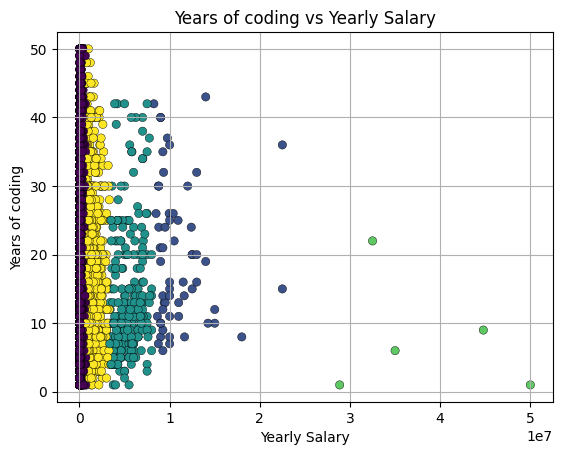

In [16]:
x = dy['ConvertedCompYearly']
y = dy['YearsCode']
plt.scatter(x, y, c = label, edgecolor='black', linewidth=0.3)
plt.xlabel('Yearly Salary')
plt.ylabel('Years of coding')
plt.title('Years of coding vs Yearly Salary')
plt.grid()
plt.show()